In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15973, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 15973 (delta 87), reused 116 (delta 75), pack-reused 15831
Receiving objects: 100% (15973/15973), 14.60 MiB | 16.73 MiB/s, done.
Resolving deltas: 100% (10956/10956), done.


In [2]:
%cd yolov5
!python -m pip install -r requirements.txt

/kaggle/working/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 12.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 21.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
opentelemetry-api 1.17.0 requires importlib-metadata~=6.0.0, but you have importlib

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CmVy8mKymH697jI1WrCS")
project = rf.workspace("codev").project("codev")
dataset = project.version(3).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=190418265a08f5e6653f3f473c3110703672da2f5d6d5b524a4e28325aadef89
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully un

Extracting Dataset Version Zip to Codev-3 in yolov5pytorch:: 100%|██████████| 8092/8092 [00:01<00:00, 4126.25it/s]


In [23]:
!python train.py --data Codev-3/data.yaml --hyp data/hyps/hyp.scratch-med.yaml --weights yolov5s.pt \
--epochs 40 --batch-size 32 --optimizer SGD --name train_one --patience 5 --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=Codev-3/data.yaml, hyp=data/hyps/hyp.scratch-med.yaml, epochs=40, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=train_one, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=5, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ul

In [3]:
!python val.py --weights runs/train/train_one7/weights/best.pt --data Codev-3/data.yaml 

val: data=Codev-3/data.yaml, weights=['runs/train/train_one7/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-177-g89c3040 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 36.9MB/s]
val: Scanning /kaggle/working/yolov5/Codev-3/valid/labels.cache... 798 images, 0
                 Class     Images  Instances          P          R      mAP50   
                   all        798       1801      0.694       0.65      0.694      0.499
     Agaricus bisporus        798        105       0.73      0.771      0.767      0.614
Agaricus blazei Murill       

In [ ]:
!python detect.py --weights runs/train/train_one7/weights/best.pt --source Codev-3/test/images/ --name inference --exist-ok

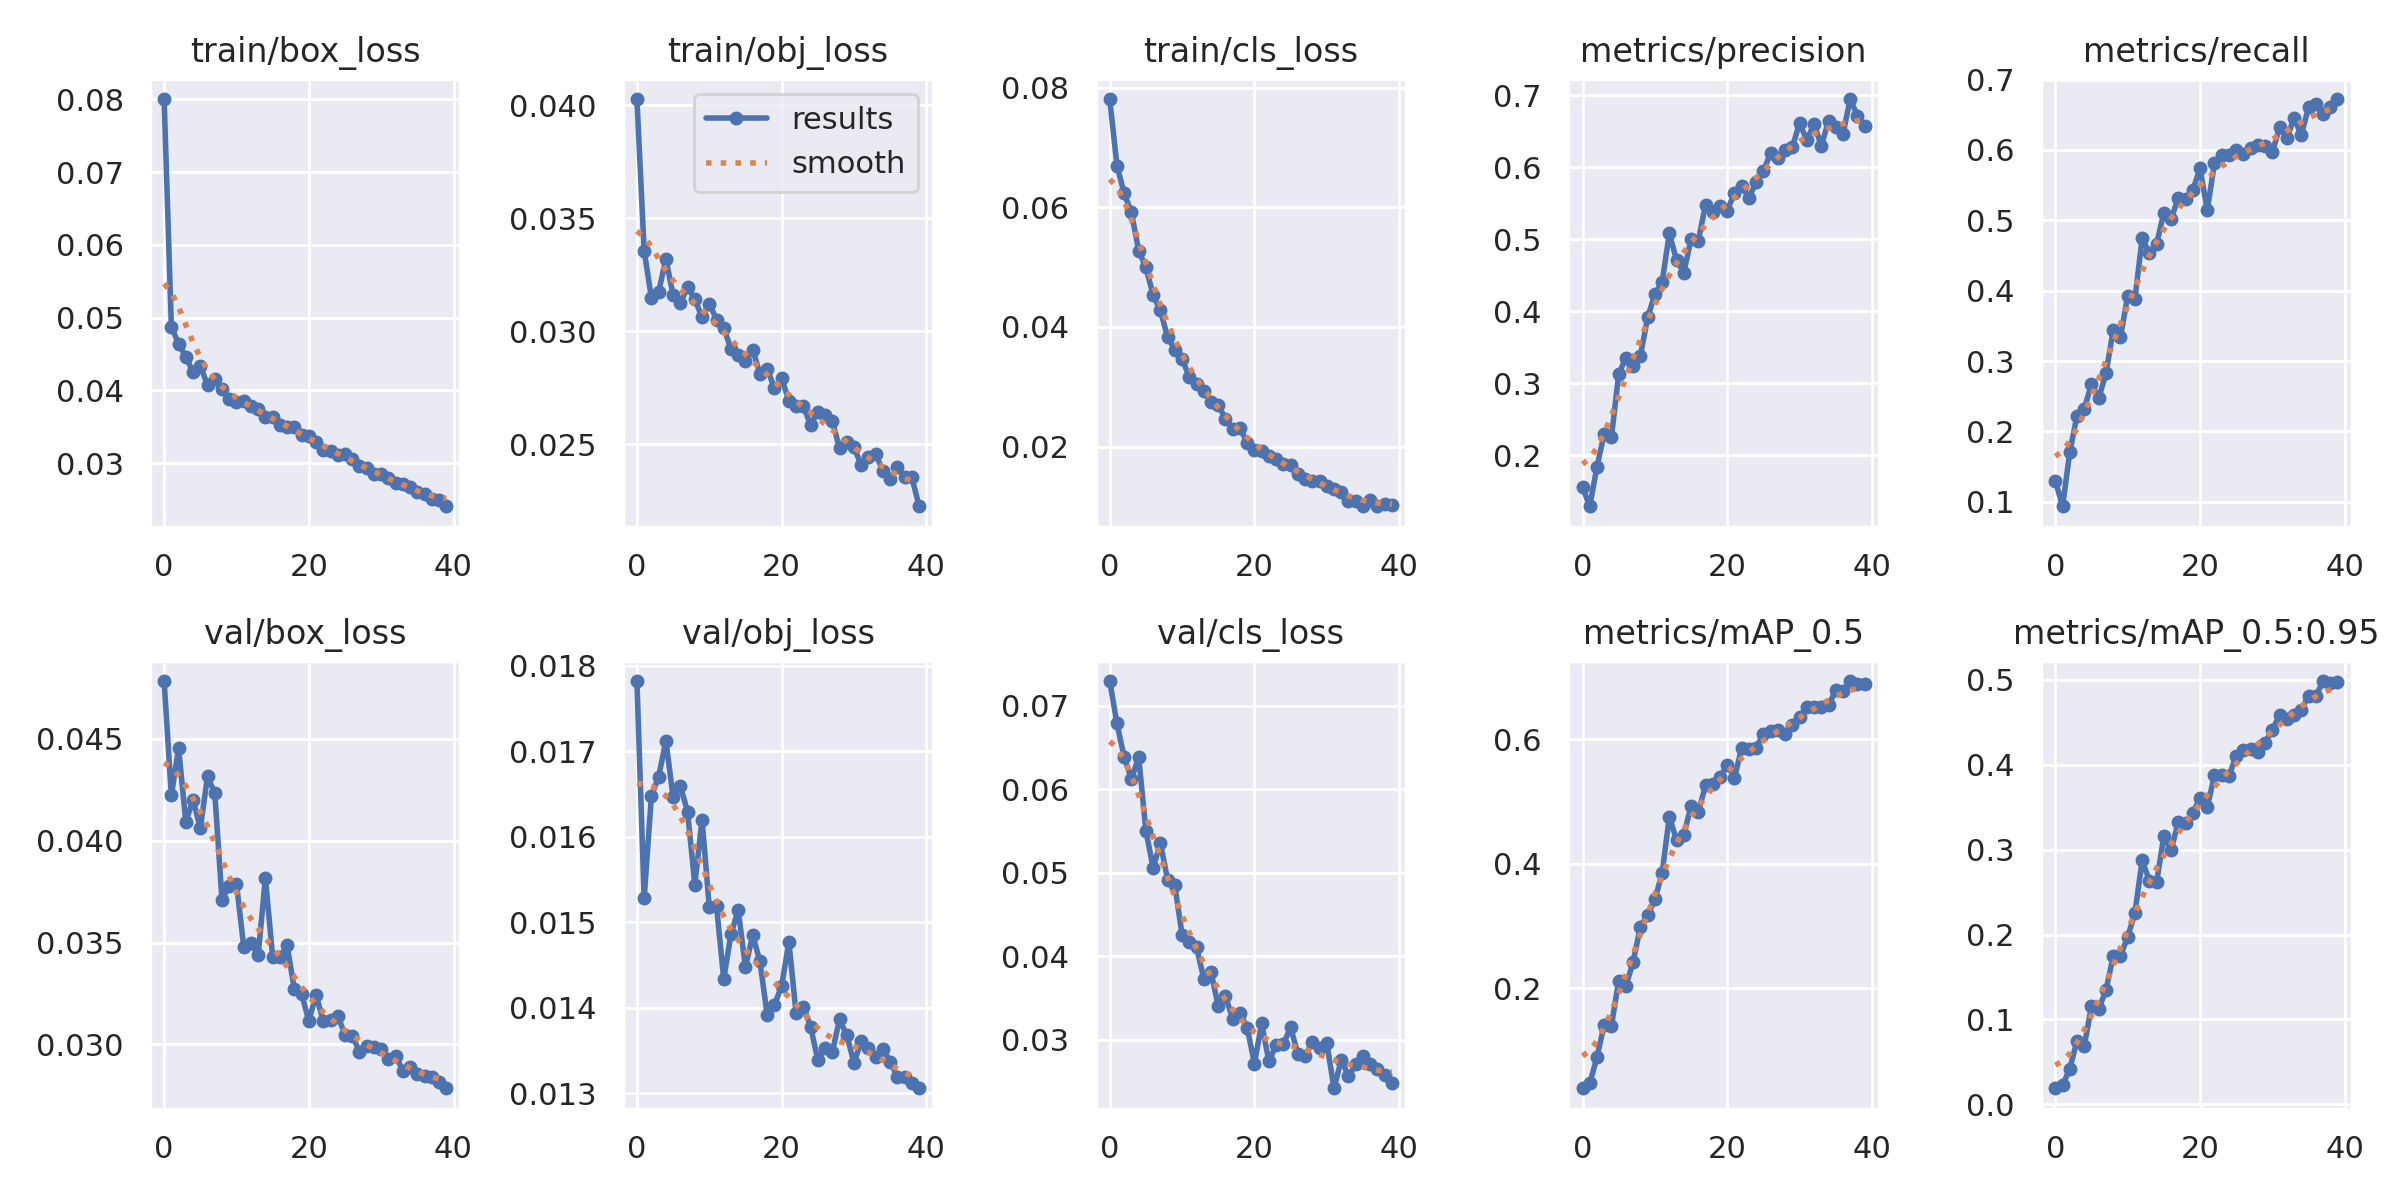

In [2]:
import glob
from IPython.display import Image, display
display(Image('/kaggle/working/yolov5/runs/train/train_one7/results.png'))

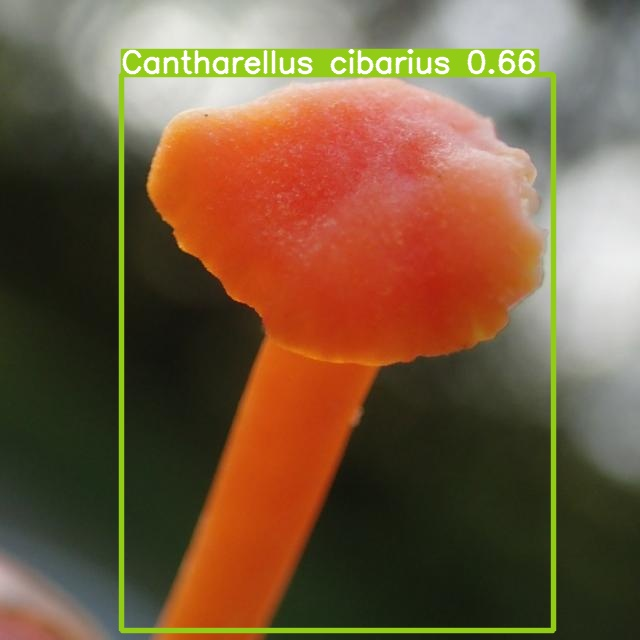

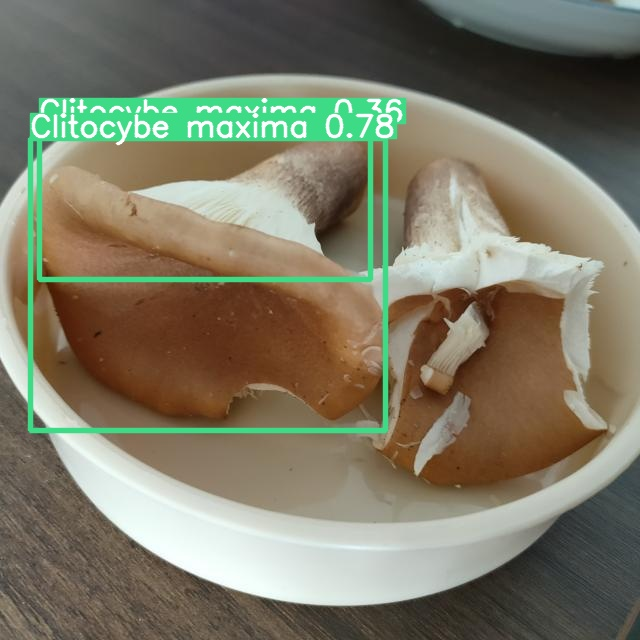

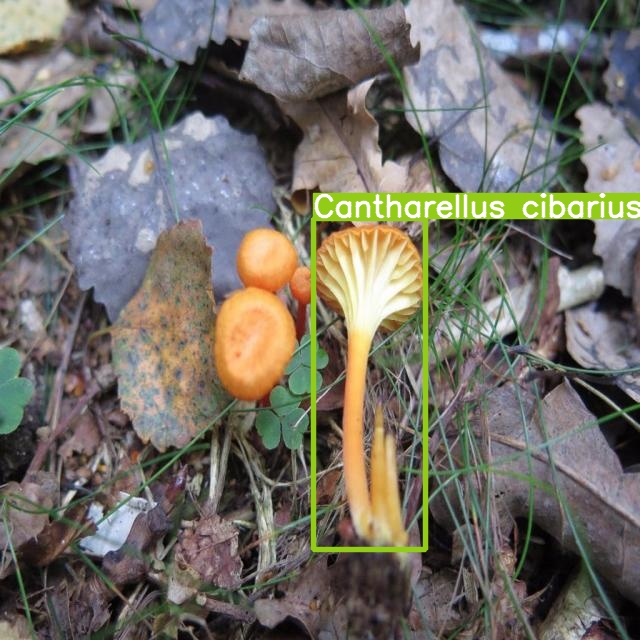

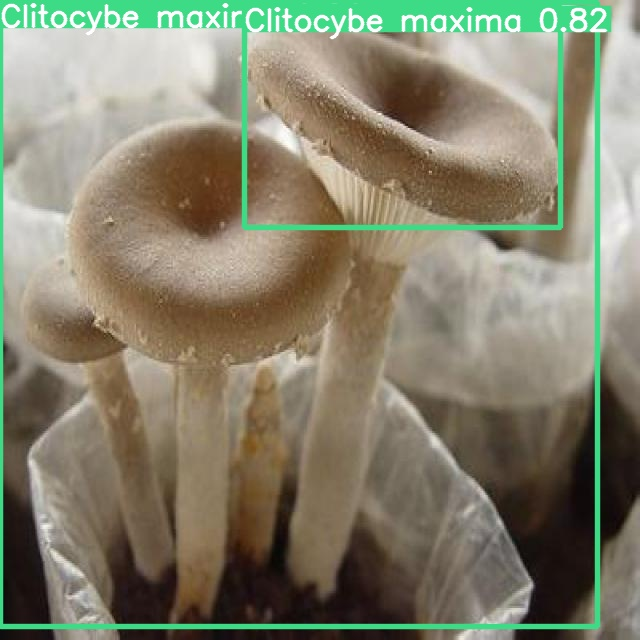

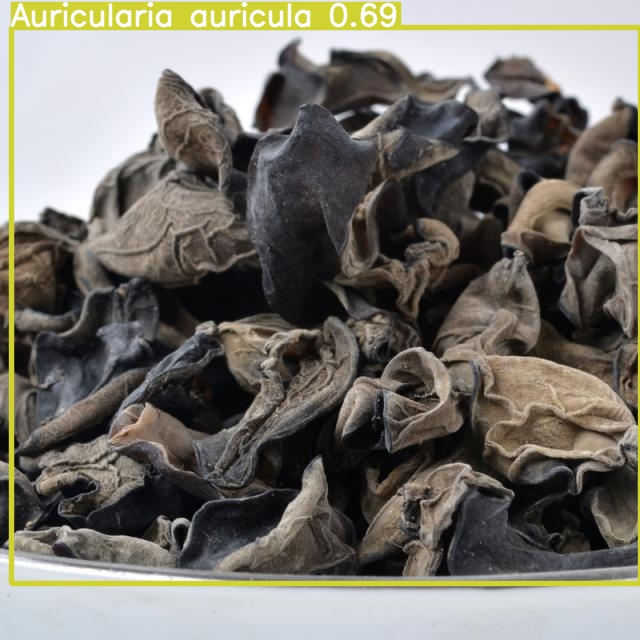

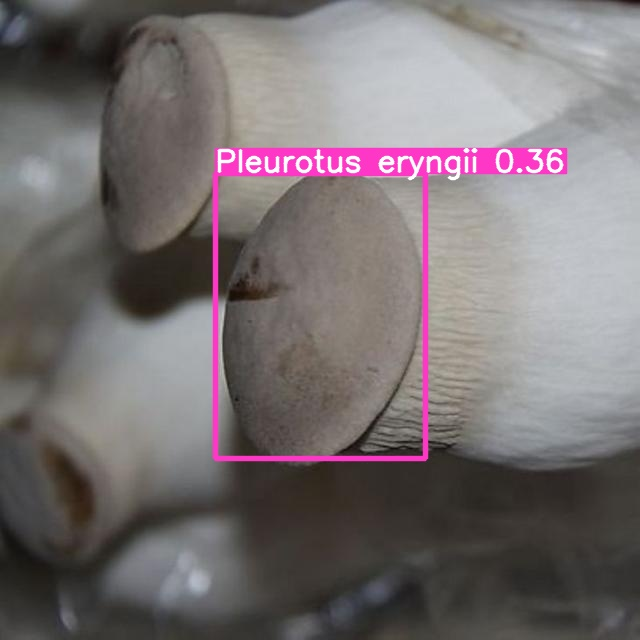

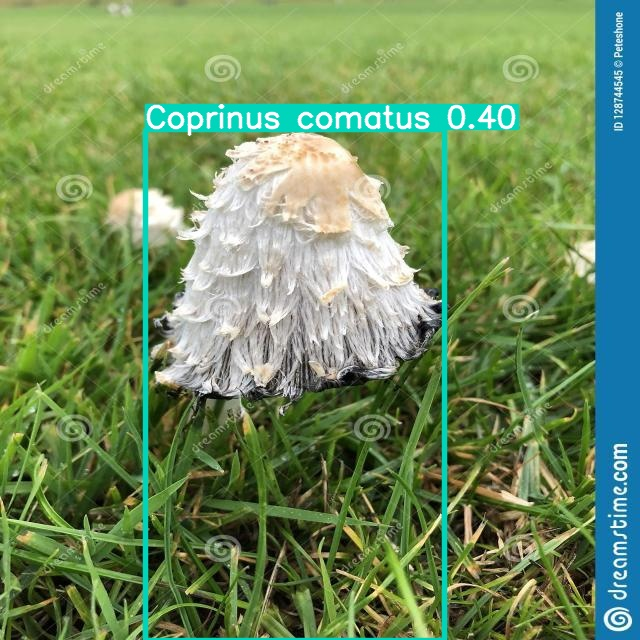

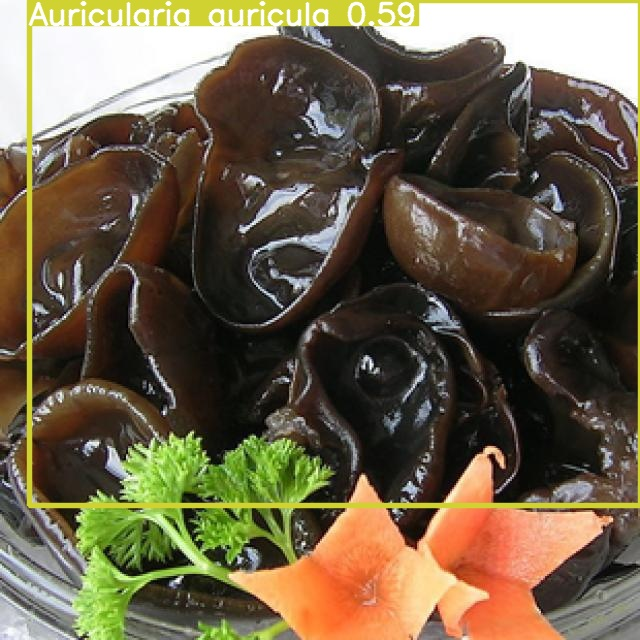

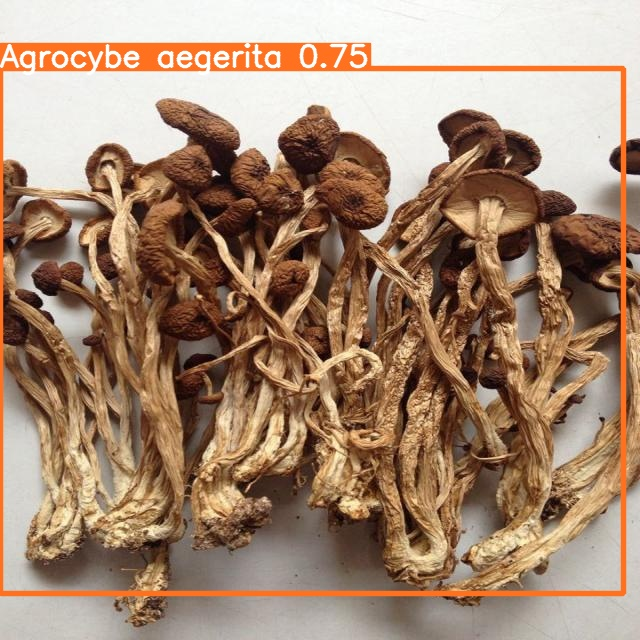

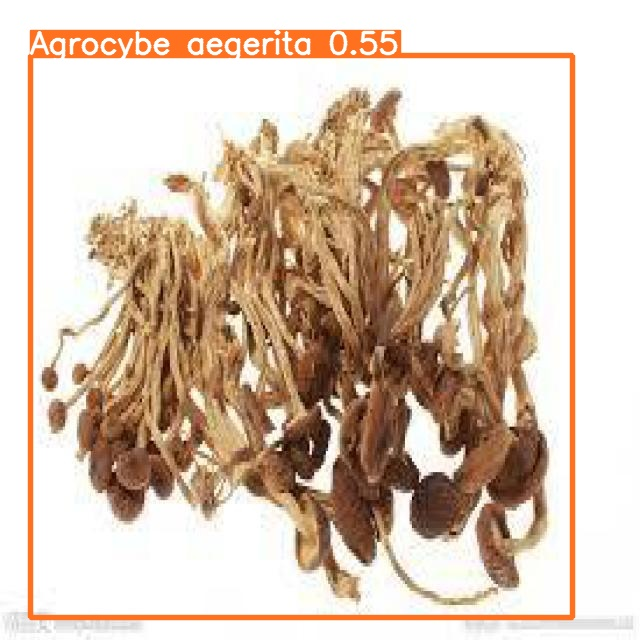

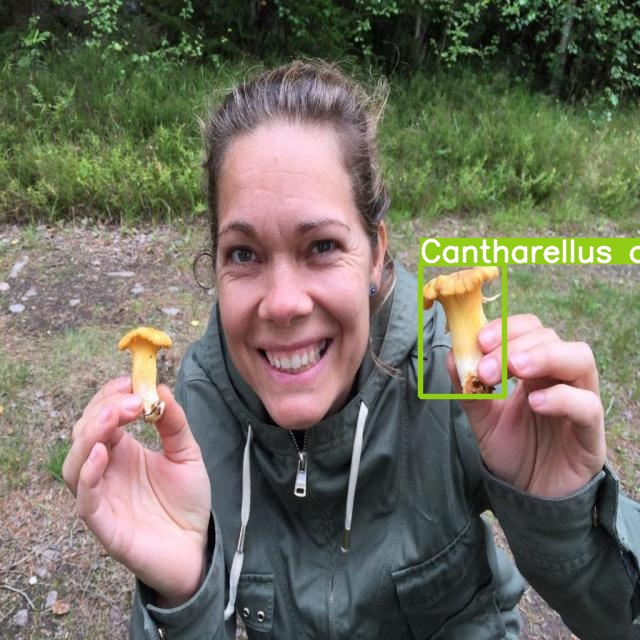

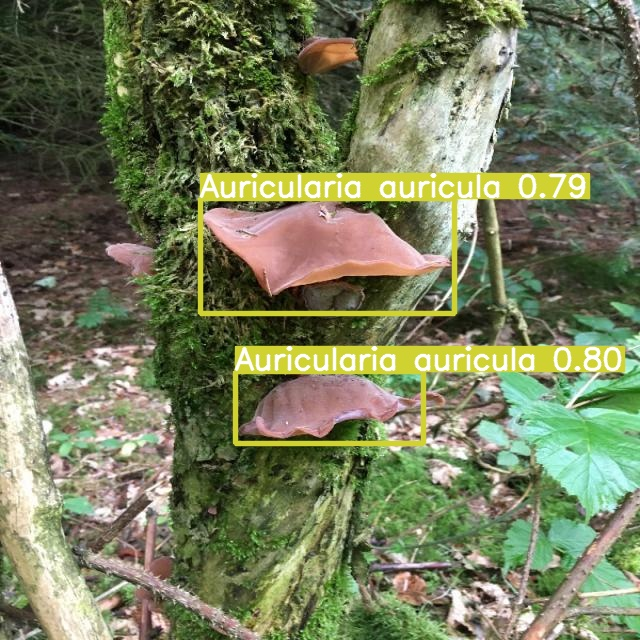

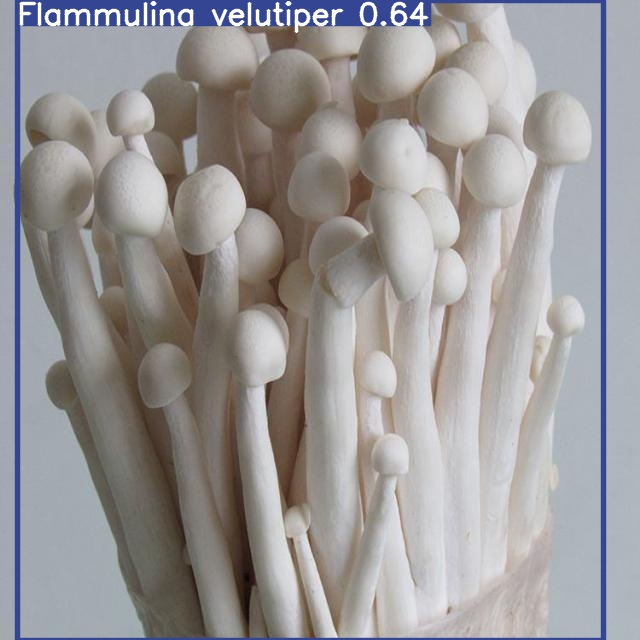

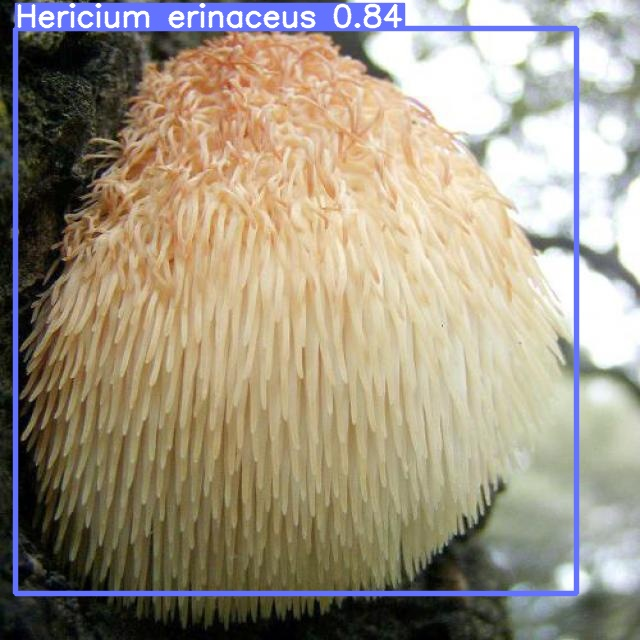

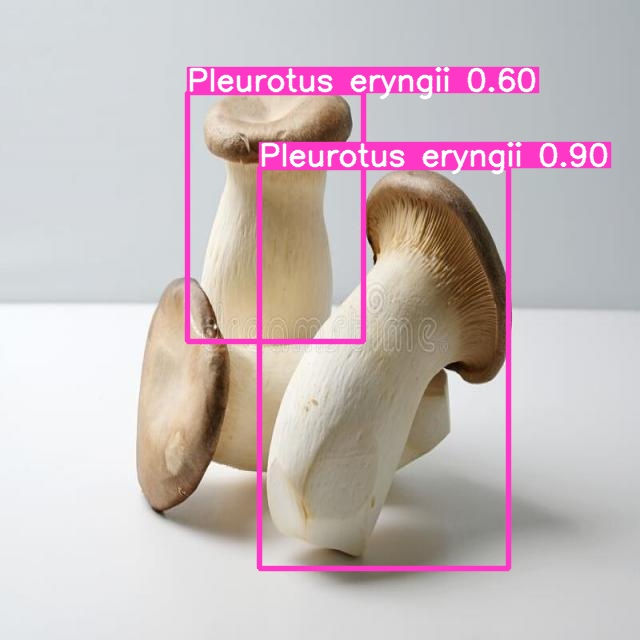

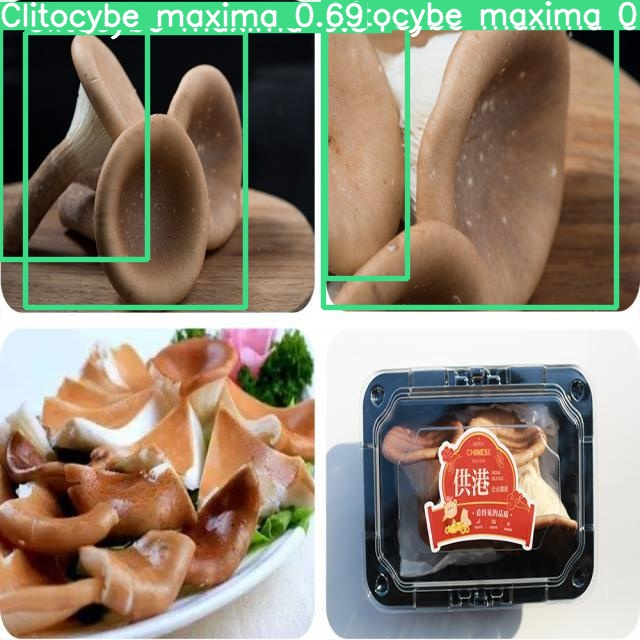

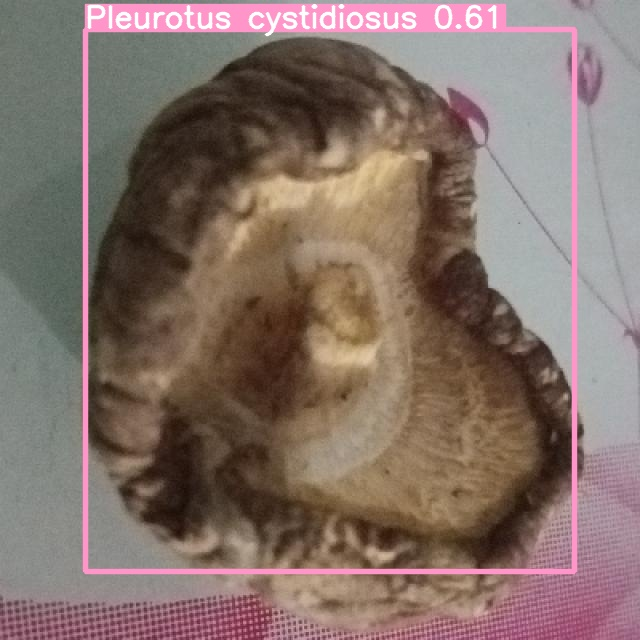

In [21]:
#display inference on ALL test images
i = 0
for (i, imageName) in enumerate(glob.glob('runs/detect/inference/*.jpg')): #assuming JPG
    if not (i % 50):
        display(Image(filename=imageName))
        print("\n")